In [1]:
import jpype

jpype.startJVM(jpype.getDefaultJVMPath())

In [94]:
import pickle as pkl
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, AutoMinorLocator, LogLocator
import numpy as np
import pandas as pd
import scipy as sp
from scipy.fft import rfft, rfftfreq
from scipy.signal import chirp as chirpsig
from scipy.signal import find_peaks as find_peaks
from scipy.signal import get_window


In [74]:
#dir = '../results/2022-11-23T15:16:55'
dir = '../results/2022-11-22T11:46:50'
files = os.listdir(dir)

scope0_files = [f for f in files if f.startswith('scope_0') and f.endswith('.pkl')]
scope1_files = [f for f in files if f.startswith('scope_1') and f.endswith('.pkl')]
cal1000_files = [f for f in files if f.startswith('BXSCAL_1000_signal') and f.endswith('.pkl')]
cal1100_files = [f for f in files if f.startswith('BXSCAL_1100_signal') and f.endswith('.pkl')]
int1000_files = [f for f in files if f.startswith('BXSCINT_1000') and f.endswith('.pkl')]
int1001_files = [f for f in files if f.startswith('BXSCINT_1001') and f.endswith('.pkl')]
qmeter_files = [f for f in files if f.startswith('qmeter_') and f.endswith('.pkl')]
blm_files = [f for f in files if f.startswith('blm_') and f.endswith('.pkl')]

scope0_files.sort()
scope1_files.sort()
cal1000_files.sort()
cal1100_files.sort()
int1000_files.sort()
int1001_files.sort()
qmeter_files.sort()
blm_files.sort()

initial = pkl.load(open(f"{dir}/initial.pkl", 'rb'))

scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
cal1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1000_files[1:]]
cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]
int1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1000_files[1:]]
int1001 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1001_files[1:]]
qmeter = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in qmeter_files[1:]]
blm = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in blm_files[1:]]

scope_time_per_sample = scope0[0]['data']['time'][-1] * 1e-09 / len(scope0[0]['data']['time'])
scope_sample_rate = 1/scope_time_per_sample


In [ ]:

tf_df = pd.DataFrame(columns=['Frequency', 'Damper', 'Spill'])

i, (param, int1k, scp) = next(enumerate(list(zip(initial['param_space'], int1000, scope0))))


#fig, ax = plt.subplots(len(int1000), 5, figsize=(14, 10), sharex='col', tight_layout=True)
fig, ax = plt.subplots(5, 2, tight_layout=True, figsize=(10, 10))

fifofreq = int1k['EaConfig']['fifoFreq']

scp_time = np.array(scp['data']['time']) * 1e-9 # convert to seconds
scp_timeRebase = scp_time - scp_time[0]
scp_data = np.array(scp['data']['value'])

ax[0, 0].plot(scp_timeRebase, scp_data, 'k')
ax[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#ax[0, 0].set_xlim(0, 1e-2)
ax[0, 0].set_xticks([0, 0.005, 0.01])
ax[0, 0].set_title("Signal")
ax[0, 1].set_title("Window")

from scipy.signal import windows

windows = [(windows.boxcar(len(scp_data)), 'Boxcar'),
            (windows.hann(len(scp_data)), 'Hann'),
            (windows.hamming(len(scp_data)), 'Hamming'),
            (windows.cosine(len(scp_data)), 'Cosine'),
]

for i, (window, window_name) in enumerate(windows):
    scp_yf = rfft(scp_data*window)
    scp_xf = rfftfreq(len(scp_data), scope_time_per_sample)
    ax[i+1, 0].plot(scp_xf, np.abs(scp_yf), 'k')
    ax[i+1, 0].set_yscale('log')
    ax[i+1, 0].set_xlim(-50, 2000)

    ax[i+1, 0].axvline(1/(param*1e-3), color='r', linestyle='-', alpha=0.7, zorder=-1, label=f'{param} ms')
    ax[i+1, 0].axvline(50, color='r', linestyle='--', alpha=0.7, zorder=-1, label='50 Hz')
    ax[i+1, 0].axvline(150, color='g', linestyle='--', alpha=0.7, zorder=-1, label='150 Hz')
    ax[i+1, 0].axvline(250, color='b', linestyle='--', alpha=0.7, zorder=-1, label='250 Hz')

    ax[i+1, 1].plot(window, 'r', label=window_name)
    ax[i+1, 1].set_xlim(0, len(window))
    ax[i+1, 0].legend(ncol=4, loc='upper left', fontsize='small')
    ax[i+1, 1].legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

['77.81 Hz', '164.265 Hz', '193.084 Hz', '219.02 Hz', '449.568 Hz']
['86.455 Hz', '161.383 Hz', '216.138 Hz', '239.193 Hz', '498.559 Hz', '651.297 Hz', '714.697 Hz', '850.144 Hz']
['213.256 Hz', '334.294 Hz', '665.706 Hz']
['204.611 Hz', '250.72 Hz']
['213.256 Hz']
['31.7 Hz', '167.147 Hz', '219.02 Hz', '334.294 Hz']
[]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]


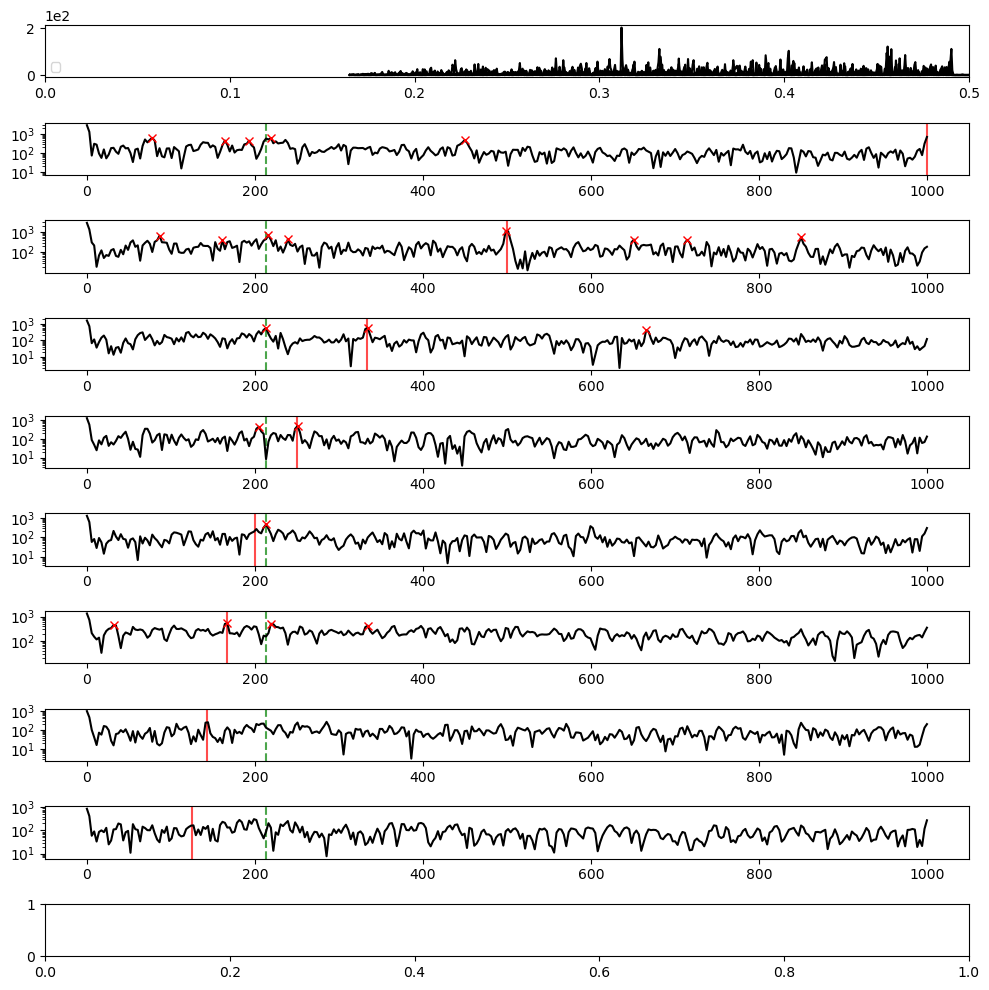

In [130]:
dir = '../results/2022-11-23T14:34:55'
files = os.listdir(dir)

scope0_files = [f for f in files if f.startswith('scope_0') and f.endswith('.pkl')]
scope1_files = [f for f in files if f.startswith('scope_1') and f.endswith('.pkl')]
cal1000_files = [f for f in files if f.startswith('BXSCAL_1000_signal') and f.endswith('.pkl')]
cal1100_files = [f for f in files if f.startswith('BXSCAL_1100_signal') and f.endswith('.pkl')]
int1000_files = [f for f in files if f.startswith('BXSCINT_1000') and f.endswith('.pkl')]
int1001_files = [f for f in files if f.startswith('BXSCINT_1001') and f.endswith('.pkl')]
qmeter_files = [f for f in files if f.startswith('qmeter_') and f.endswith('.pkl')]
blm_files = [f for f in files if f.startswith('blm_') and f.endswith('.pkl')]

scope0_files.sort()
scope1_files.sort()
cal1000_files.sort()
cal1100_files.sort()
int1000_files.sort()
int1001_files.sort()
qmeter_files.sort()
blm_files.sort()

initial = pkl.load(open(f"{dir}/initial.pkl", 'rb'))

scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
cal1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1000_files[1:]]
cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]
int1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1000_files[1:]]
int1001 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1001_files[1:]]
qmeter = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in qmeter_files[1:]]
blm = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in blm_files[1:]]

scope_time_per_sample = scope0[0]['data']['time'][-1] * 1e-09 / len(scope0[0]['data']['time'])
scope_sample_rate = 1/scope_time_per_sample

tf_df = pd.DataFrame(columns=['Frequency', 'Damper', 'Spill'])

enumerator = enumerate(list(zip(initial['param_space'], int1000, scope0)))

ffts = {}
# i, (param, int1k, scp) = next(enumerator)
fig, ax = plt.subplots(len(initial['param_space'])+1, 1, tight_layout=True, figsize=(10, 10))
for i, (param, int1k, scp) in enumerator:
#fig, ax = plt.subplots(len(int1000), 5, figsize=(14, 10), sharex='col', tight_layout=True)
    

    fifofreq = int1k['EaConfig']['fifoFreq']

    int_data = int1k['countArray']
    int_time_reconstructed = np.arange(0, len(int_data) * 1/fifofreq, 1/fifofreq)
    ax[0].plot(int_time_reconstructed[330:], int_data[330:], 'k')
    ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[0].set_xlim(0, 0.5)

    from scipy.signal import windows

    window = windows.hann(len(int_data))

    yf = rfft(int_data[330:]*window[330:])
    xf = rfftfreq(len(int_data[330:]), 1/fifofreq)
    
    ffts[param] = (xf, yf)

    ax[i+1].plot(xf, np.abs(yf), 'k', alpha=1)
    ax[i+1].set_yscale('log')


    ax[i+1].axvline(1/(param*1e-3), color='r', linestyle='-', alpha=0.7, zorder=-1, label=f'{param} ms')
    ax[i+1].axvline(213, color='g', linestyle='--', alpha=0.7, zorder=-1, label=f'{param} ms')
    # ax[i+1, 0].axvline(90, color='g', linestyle='--', alpha=0.5, zorder=-1, label='90 Hz')
    # ax[i+1, 0].axvline(200, color='b', linestyle='--', alpha=0.5, zorder=-1, label='200 Hz')



    peaks, props = sp.signal.find_peaks(np.abs(yf), prominence=3e2, height=4e2)
    print([f"{round(i, 3)} Hz" for i in xf[peaks]])
    # plot peaks
    ax[i+1].plot(xf[peaks], np.abs(yf)[peaks], "x", color='r')

    ax[0].legend(ncol=4, loc='lower left', fontsize='small')


In [131]:
with open("ffts.pkl", 'wb') as f:
    pkl.dump(ffts, f)

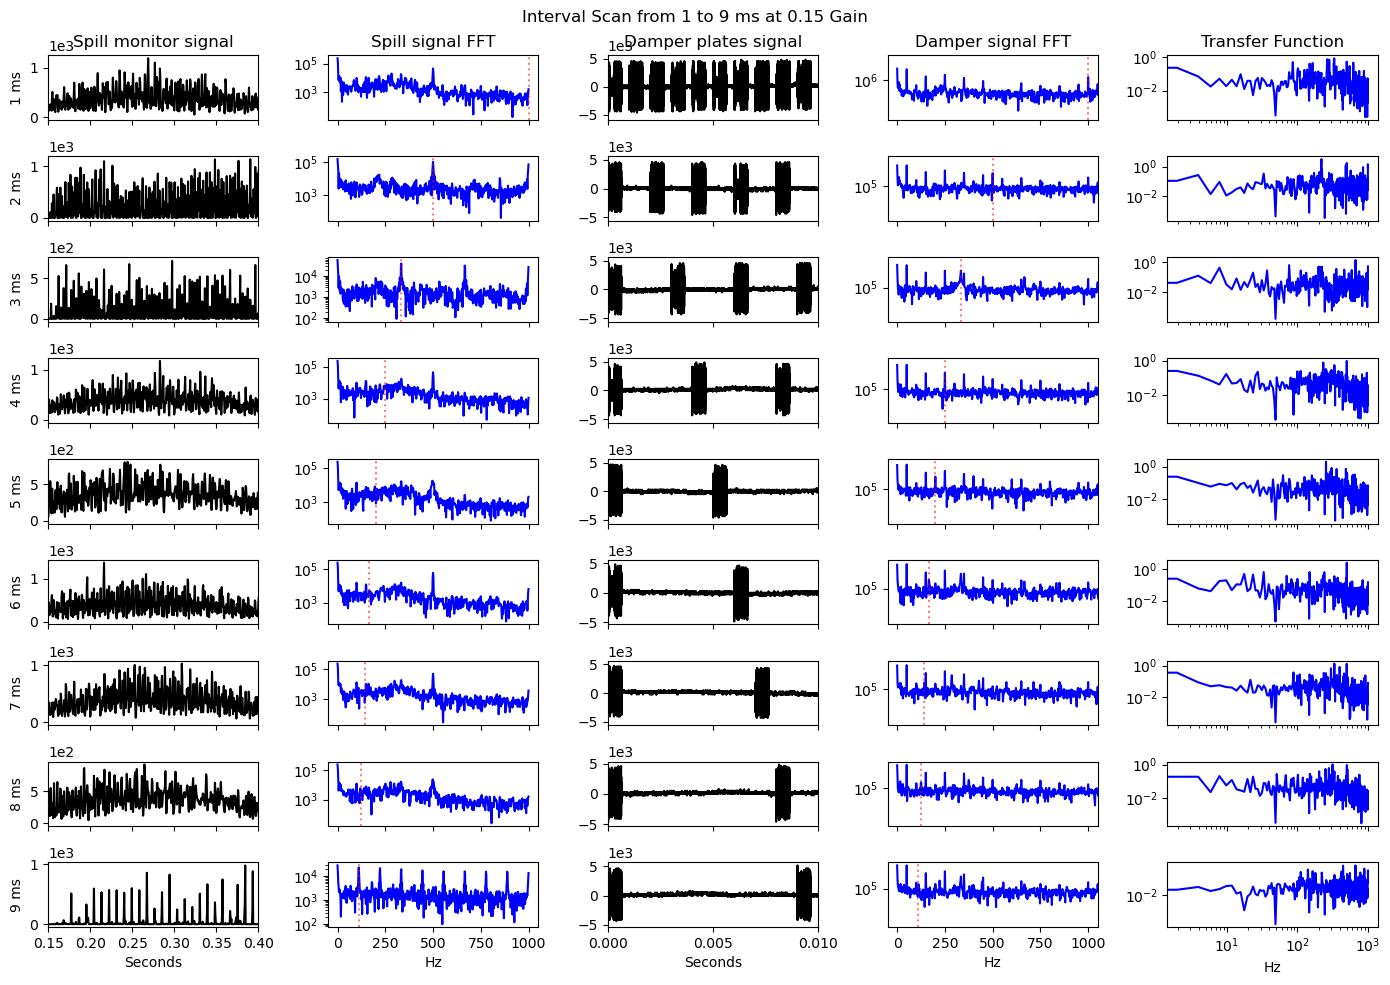

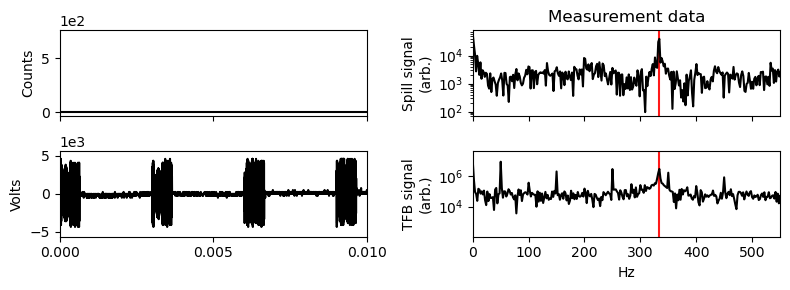

In [3]:
dir = '../results/2022-11-23T15:16:55'
files = os.listdir(dir)

scope0_files = [f for f in files if f.startswith('scope_0') and f.endswith('.pkl')]
scope1_files = [f for f in files if f.startswith('scope_1') and f.endswith('.pkl')]
cal1000_files = [f for f in files if f.startswith('BXSCAL_1000_signal') and f.endswith('.pkl')]
cal1100_files = [f for f in files if f.startswith('BXSCAL_1100_signal') and f.endswith('.pkl')]
int1000_files = [f for f in files if f.startswith('BXSCINT_1000') and f.endswith('.pkl')]
int1001_files = [f for f in files if f.startswith('BXSCINT_1001') and f.endswith('.pkl')]
qmeter_files = [f for f in files if f.startswith('qmeter_') and f.endswith('.pkl')]
blm_files = [f for f in files if f.startswith('blm_') and f.endswith('.pkl')]

scope0_files.sort()
scope1_files.sort()
cal1000_files.sort()
cal1100_files.sort()
int1000_files.sort()
int1001_files.sort()
qmeter_files.sort()
blm_files.sort()

initial = pkl.load(open(f"{dir}/initial.pkl", 'rb'))

scope0 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope0_files[1:]]
scope1 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in scope1_files[1:]]
cal1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1000_files[1:]]
cal1100 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in cal1100_files[1:]]
int1000 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1000_files[1:]]
int1001 = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in int1001_files[1:]]
qmeter = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in qmeter_files[1:]]
blm = [pkl.load(open(f"{dir}/{f}", 'rb')) for f in blm_files[1:]]

scope_time_per_sample = scope0[0]['data']['time'][-1] * 1e-09 / len(scope0[0]['data']['time'])
scope_sample_rate = 1/scope_time_per_sample

fig, ax = plt.subplots(len(int1000), 5, figsize=(14, 10), sharex='col', tight_layout=True)

tf_df = pd.DataFrame(columns=['Frequency', 'Damper', 'Spill'])


for i, (param, int1k, scp) in enumerate(list(zip(initial['param_space'], int1000, scope0))):

    fifofreq = int1k['EaConfig']['fifoFreq']

    int_data = int1k['countArray']
    int_time_reconstructed = np.arange(0, len(int_data) * 1/fifofreq, 1/fifofreq)
    ax[i, 0].plot(int_time_reconstructed, int_data, 'k')
    ax[i, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 0].set_xlim(0.15, 0.4)

    int_yf = rfft(int_data)
    int_xf = rfftfreq(len(int_data), 1/fifofreq)
    ax[i, 1].plot(int_xf, np.abs(int_yf), 'b')
    ax[i, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 1].set_yscale('log')

    scp_time = np.array(scp['data']['time']) * 1e-9 # convert to seconds
    scp_timeRebase = scp_time - scp_time[0]
    scp_data = np.array(scp['data']['value'])
    ax[i, 2].plot(scp_timeRebase, scp_data, 'k')
    ax[i, 2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax[i, 2].set_xlim(0, 1e-2)
    ax[i, 2].set_xticks([0, 0.005, 0.01])

    scp_window = get_window
    scp_yf = rfft(scp_data)
    scp_xf = rfftfreq(len(scp_data), scope_time_per_sample)
    ax[i, 3].plot(scp_xf, np.abs(scp_yf), 'b')
    ax[i, 3].set_yscale('log')
    ax[i, 3].set_xlim(-50, 1050)

    ax[i, 4].loglog(int_xf, np.abs(int_yf) / np.abs(scp_yf)[:len(int_xf)], 'b')

    if initial['knob'] == 'interval':
        ax[i, 0].set_ylabel(f"{param} ms")
        ax[i, 1].axvline(1/(param * 1e-3), color='r', linestyle=':', alpha=0.5)
        ax[i, 3].axvline(1/(param * 1e-3), color='r', linestyle=':', alpha=0.5)

    driving_freq = np.round_(1/(param*1e-3), 0)
    try:
        spill_sig_at_driving_freq = np.abs(int_yf[np.round_(int_xf, 0) == driving_freq][0])
    except IndexError:
        spill_sig_at_driving_freq = np.abs((int_yf[np.round_(int_xf, 0) == driving_freq+1][0] + int_yf[np.round_(int_xf, 0) == driving_freq-1][0])/2)
    try:
        damper_sig_at_driving_freq = np.abs(scp_yf[np.round_(scp_xf, 0) == driving_freq][0])
    except IndexError:
        damper_sig_at_driving_freq = np.abs((scp_yf[np.round_(scp_xf, 0) == driving_freq+1][0] + scp_yf[np.round_(scp_xf, 0) == driving_freq-1][0])/2)

    tf_df = pd.concat([tf_df, pd.DataFrame.from_records([{'Frequency': driving_freq, 'Damper': damper_sig_at_driving_freq, 'Spill': spill_sig_at_driving_freq}])], ignore_index=True)


ax[0, 0].set_title('Spill monitor signal')
ax[0, 1].set_title('Spill signal FFT')

ax[0, 2].set_title('Damper plates signal')
ax[0, 3].set_title('Damper signal FFT')

ax[0, 4].set_title('Transfer Function')

ax[i, 0].set_xlabel("Seconds")
ax[i, 1].set_xlabel("Hz")

ax[i, 2].set_xlabel("Seconds")
ax[i, 3].set_xlabel("Hz")

ax[i, 4].set_xlabel("Hz")

gain = initial['qmeter_settings']['ex_h_amplitude'][1]
plt.suptitle(f"Interval Scan from 1 to 9 ms at {gain} Gain")

plt.tight_layout(pad=0.8, w_pad=0.1, h_pad=0.4)

# ffig, aax = plt.subplots(2, 2, figsize=(8, 3), tight_layout=True, sharex="col")

# for i, (param, int1k, scp) in enumerate(list(zip(initial['param_space'], int1000, scope0))):
#     if i == 2:
#         fifofreq = int1k['EaConfig']['fifoFreq']
#         int_data = int1k['countArray']

#         int_time_reconstructed = np.arange(0, len(int_data) * 1/fifofreq, 1/fifofreq)
#         aax[0, 0].plot(int_time_reconstructed, int_data, 'k')
#         aax[0, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#         aax[0, 0].set_ylabel("Counts")

#         int_yf = rfft(int_data)
#         int_xf = rfftfreq(len(int_data), 1/fifofreq)
#         aax[0, 1].plot(int_xf, np.abs(int_yf), 'k')
#         aax[0, 1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#         aax[0, 1].set_yscale('log')
#         aax[0, 1].set_ylabel("Spill signal\n(arb.)")
#         aax[0, 1].set_title("Measurement data")

#         scp_time = np.array(scp['data']['time']) * 1e-9 # convert to seconds
#         scp_timeRebase = scp_time - scp_time[0]
#         scp_data = np.array(scp['data']['value'])
#         aax[1, 0].plot(scp_timeRebase, scp_data, 'k')
#         aax[1, 0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
#         aax[1, 0].set_xlim(0, 1e-2)
#         aax[1, 0].set_xticks([0, 0.005, 0.01])
#         aax[1, 0].set_ylabel("Volts")

#         scp_window = get_window
#         scp_yf = rfft(scp_data)
#         scp_xf = rfftfreq(len(scp_data), scope_time_per_sample)
#         aax[1, 1].plot(scp_xf, np.abs(scp_yf), 'k')
#         aax[1, 1].set_yscale('log')
#         aax[1, 1].set_xlim(0, 550)
#         aax[1, 1].set_ylabel("TFB signal\n(arb.)")

#         aax[0, 1].axvline(1/(param * 1e-3), color='r', linestyle='-', alpha=0.9, zorder=-1)
#         aax[1, 1].axvline(1/(param * 1e-3), color='r', linestyle='-', alpha=0.9, zorder=-1)

#         aax[1, 1].set_xlabel("Hz")

        
#     else:
#         continue

